In [1]:
library(ape)
library(sitePath)
library(ggplot2)
library(ggrepel)
library(aplot)
suppressPackageStartupMessages(library(treeio))
suppressPackageStartupMessages(library(ggtree))

PLOTS_DIR <- "Plots"

PATH_SNP_PROP <- 0.025

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [2]:
data(h3n2_align)
data(h3n2_tree)

tr <- addMSA(h3n2_tree, alignment = h3n2_align)

align <- attr(tr, "align")
sites <- attr(tr, "reference")

tree <- as.phylo(tr)

names(align) <- tree[["tip.label"]]
nTips <- length(tree[["tip.label"]])

The "tree" object is not bifurcated and resolved by "multi2di" function.



In [3]:
snpSites <- SNPsites(tr)

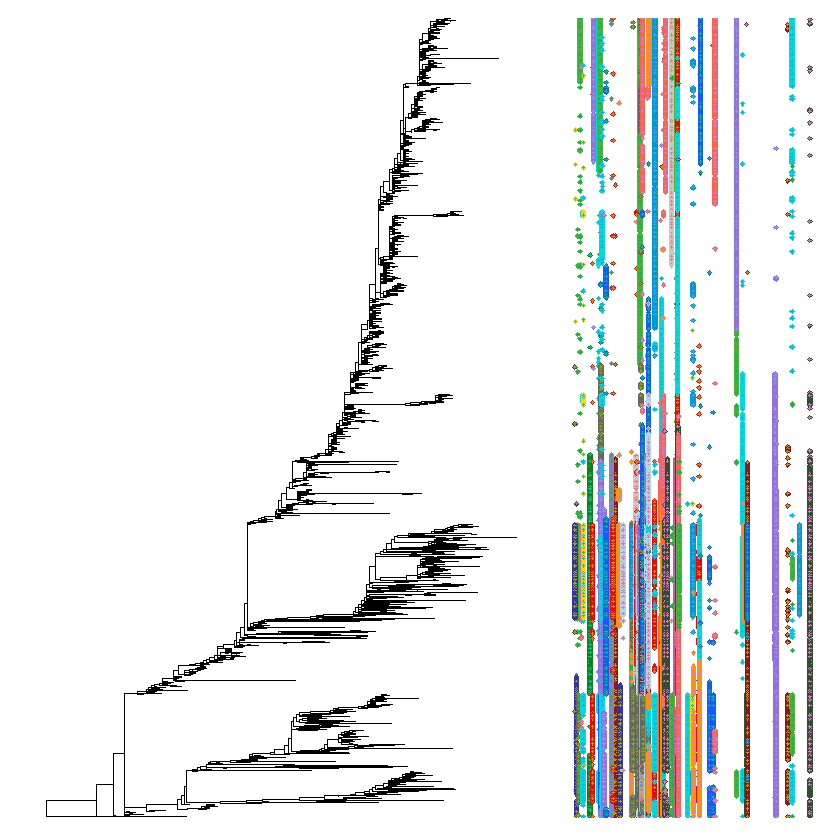

In [5]:
p <- plotMutSites(snpSites)
p

In [3]:
majorSNP <- vapply(X = sites, FUN = function(s) {
    aaSummary <- sitePath:::tableAA(align, s - 1)
    gapIndex <- which(names(aaSummary) == '-')
    if (length(gapIndex) != 0) {
        aaSummary <- aaSummary[-gapIndex]
    }
    names(aaSummary)[which.max(aaSummary)]
}, FUN.VALUE = character(1))

In [4]:
snpColors <- vapply(X = sitePath:::AA_FULL_NAMES, FUN = function(i) {
    sitePath:::AA_COLORS[[i]]
}, FUN.VALUE = character(1))
names(snpColors) <- toupper(names(snpColors))

In [6]:
allSNP <- lapply(names(align), function(ac) {
    seq <- align[[ac]]
    res <- as.data.frame(t(vapply(X = seq_along(majorSNP), FUN = function(site) {
        s <- as.integer(site)
        snp <- substr(seq, s, s)
        if (snp != majorSNP[[site]] && snp != '-') {
            return(c(site, snp))
        } else {
            return(c(site, NA_character_))
        }
    }, FUN.VALUE = c(integer(1), character(1)))))
    res <- res[complete.cases(res), ]
    colnames(res) <- c("Pos", "SNP")
    res[["Pos"]] <- as.integer(res[["Pos"]])
    res[["Accession"]] <- ac
    res
})
allSNP <- do.call(rbind, allSNP)
allSNP <- allSNP[, c(3, 1, 2)]
allSNP[["color"]] <- as.character(snpColors[allSNP[, "SNP"]])

snpSummary <- as.data.frame(table(allSNP[["Pos"]], allSNP[["SNP"]]))

allSNP <- merge(
    x = allSNP, 
    y = snpSummary, 
    by.x = c("Pos", "SNP"),
    by.y = c("Var1", "Var2"),
    all.x = TRUE
)

In [7]:
snp_data <- allSNP[which(allSNP[, "Freq"] >= nTips * PATH_SNP_PROP), c(3, 1, 2, 4)]

In [8]:
p1 <- ggplot(snp_data, aes(x = get("Pos"), y = get("Accession"), fill = get("SNP"))) +
    geom_point(shape = 23, size = 1, stroke = 0, color = snp_data[["color"]]) +
    theme(
        axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.background = element_rect(fill = "white"),
        legend.position = "none"
    )

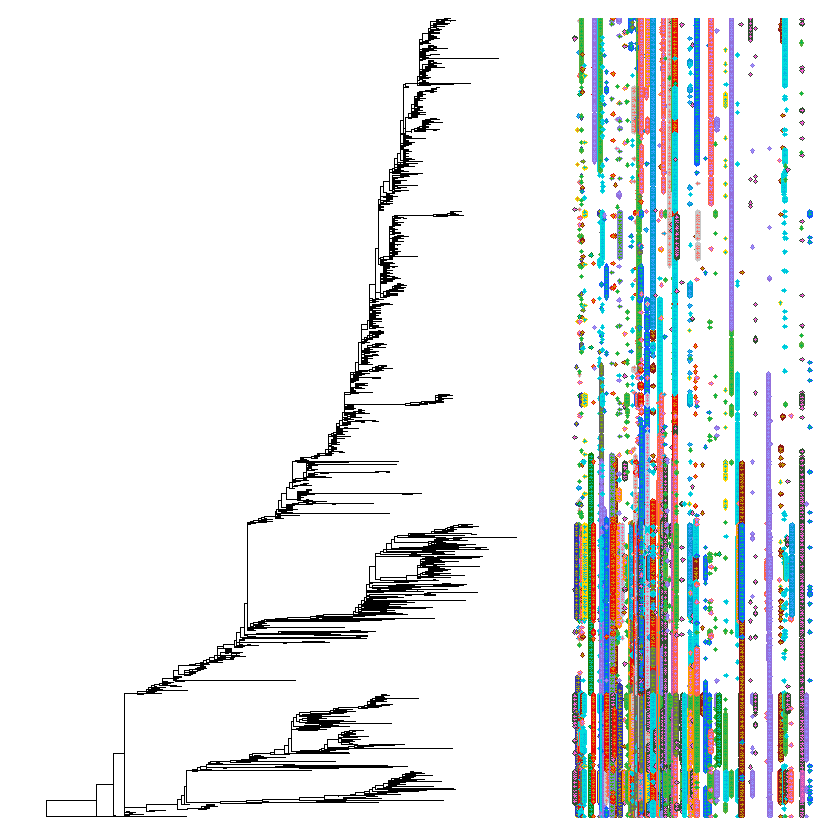

In [45]:
p <- insert_left(p1, ggtree(tree), 2)
p

In [6]:
ggsave(
    filename = file.path(PLOTS_DIR, "snpTree.svg"),
    plot = p, 
    device = "svg",
    width = 18,
    height = 18
)

In [7]:
paths <- lineagePath(tr, PATH_SNP_PROP)

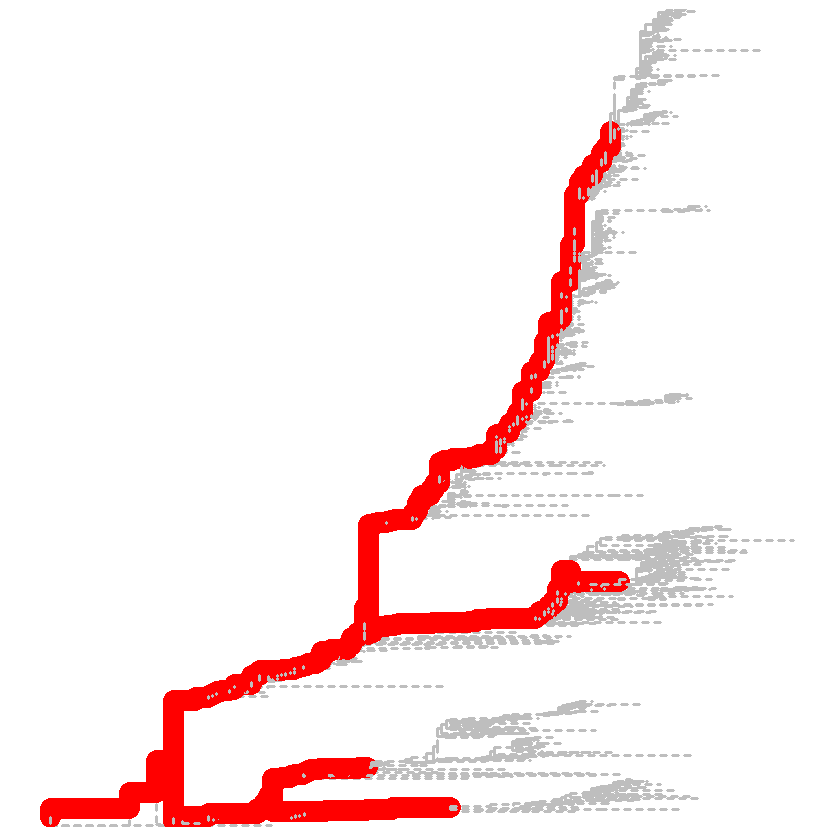

In [8]:
attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(paths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(paths))] <- 0.5

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("red", "grey")) + 
    theme(legend.position = "none")
p

In [9]:
ggsave(
    filename = file.path(PLOTS_DIR, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

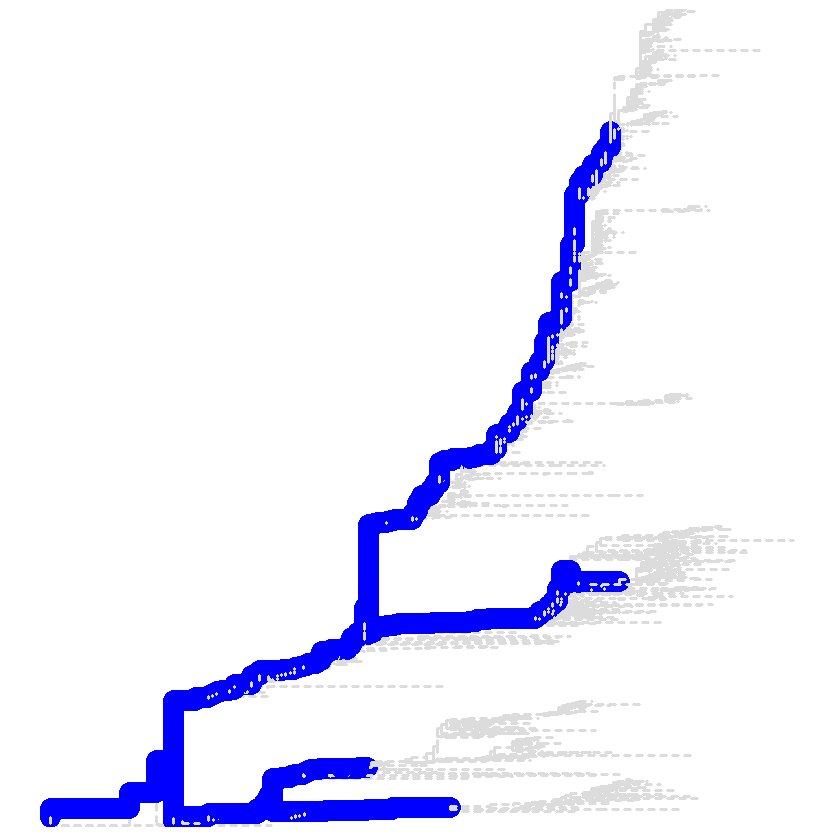

In [10]:
p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [11]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway0.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

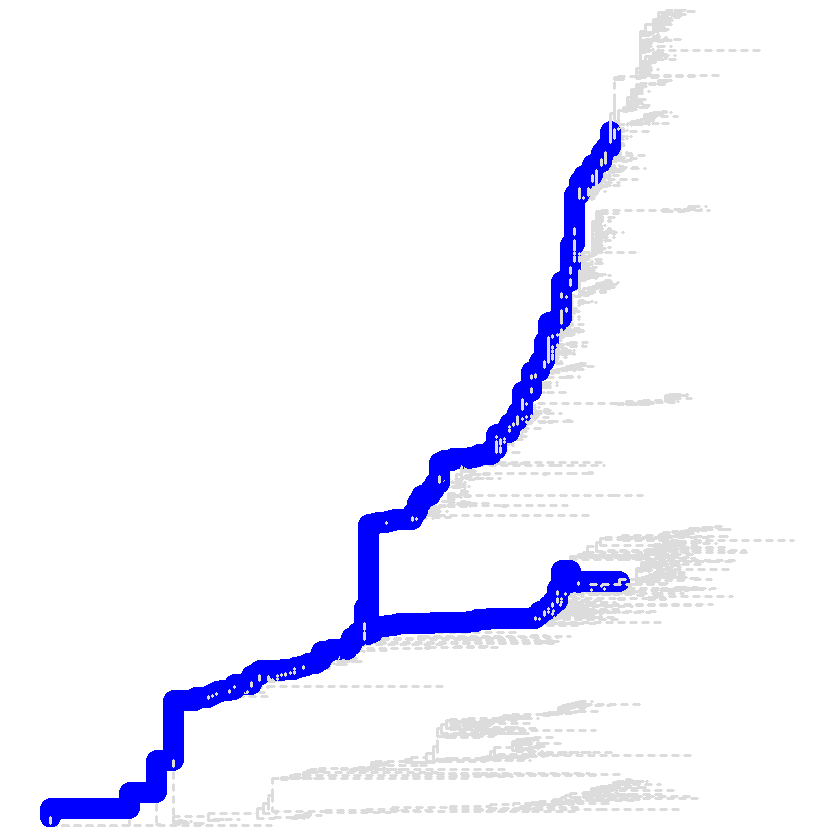

In [12]:
subPaths <- paths[2:3]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "#DCDCDC")) + 
    theme(legend.position = "none")
p

In [13]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway1.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

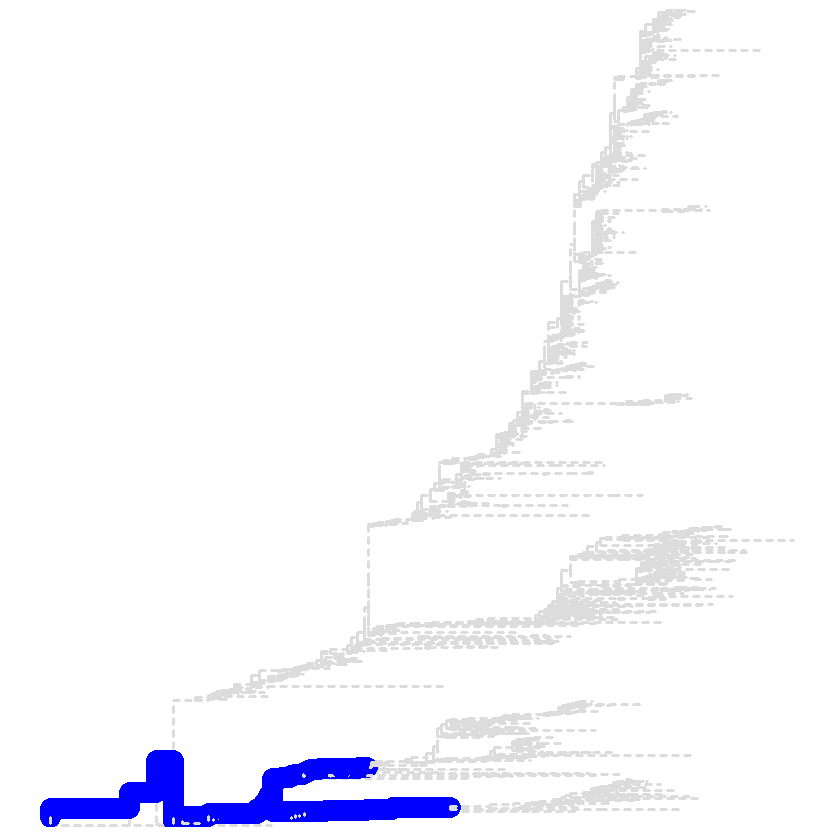

In [14]:
subPaths <- paths[c(1, 4)]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [15]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway2.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

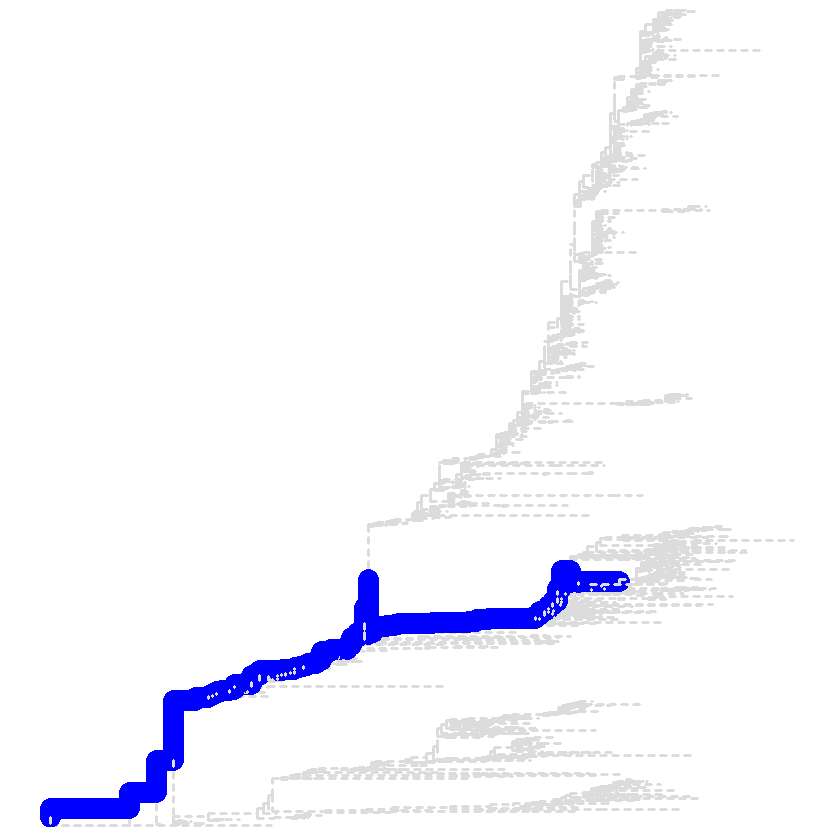

In [16]:
subPaths <- paths[2]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [17]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway3.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

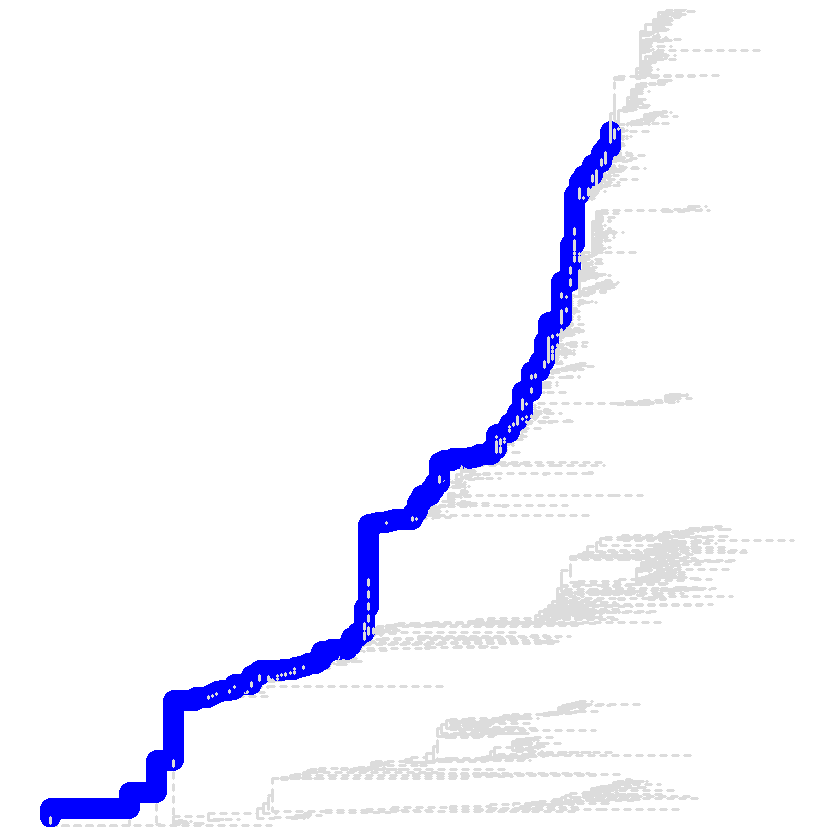

In [18]:
subPaths <- paths[3]

attr(tree, "group") <- rep(1, times = Ntip(tree) + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = Ntip(tree) + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [19]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway4.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

In [20]:
mutations <- fixationSites(paths)

In [21]:
grp <- fixationPath(mutations)

Warning message:
"`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


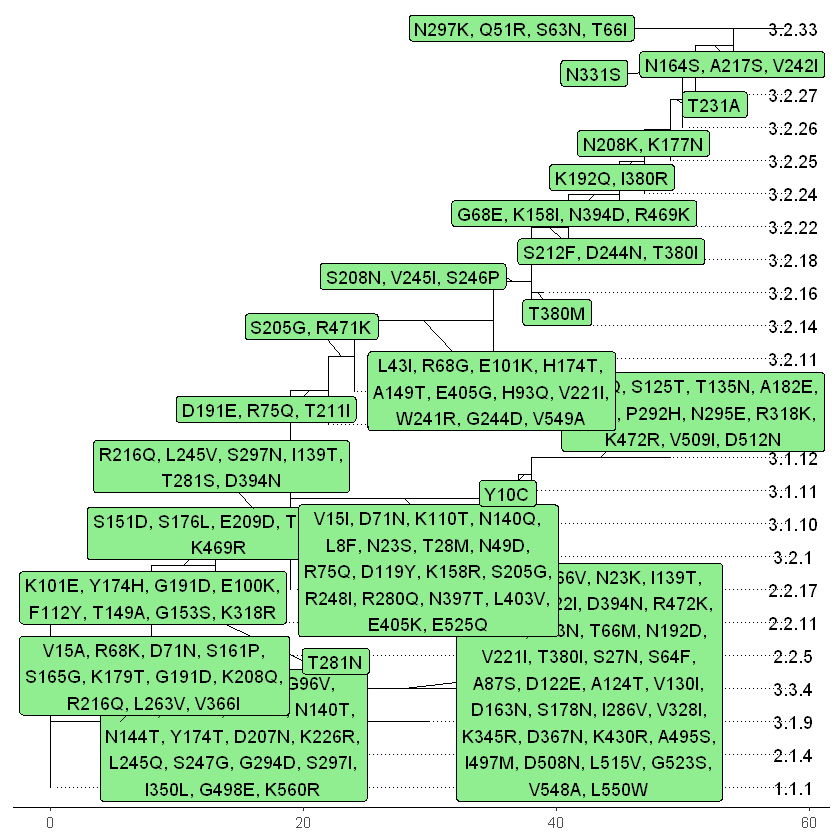

In [22]:
plot(grp)

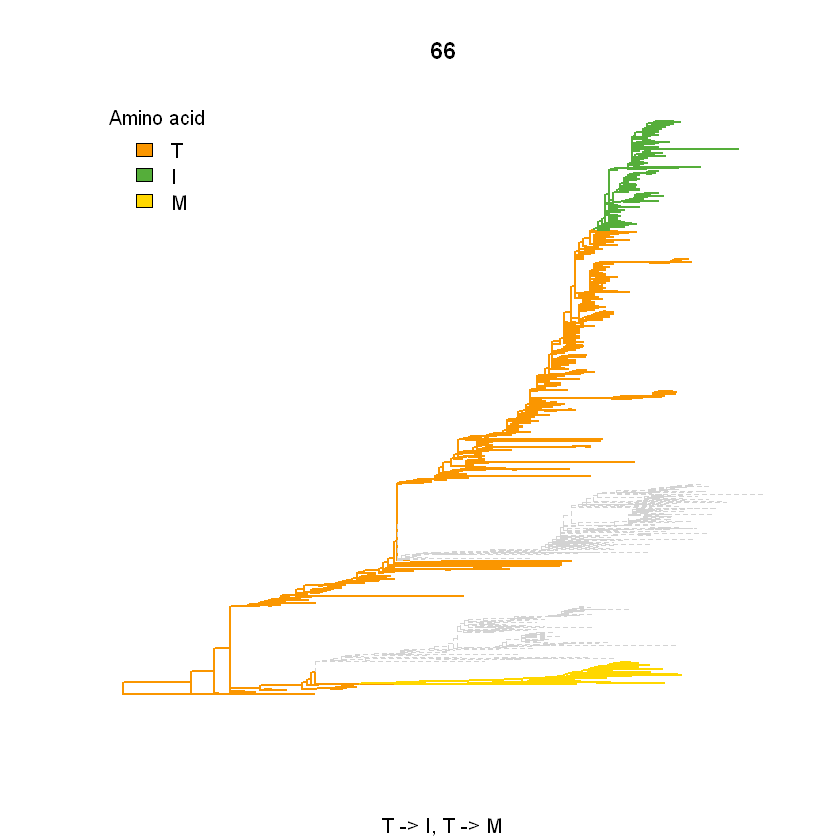

In [23]:
plotSingleSite(mutations, 66)

In [25]:
svg(filename = file.path(PLOTS_DIR, "singleFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 212)
invisible(dev.off())

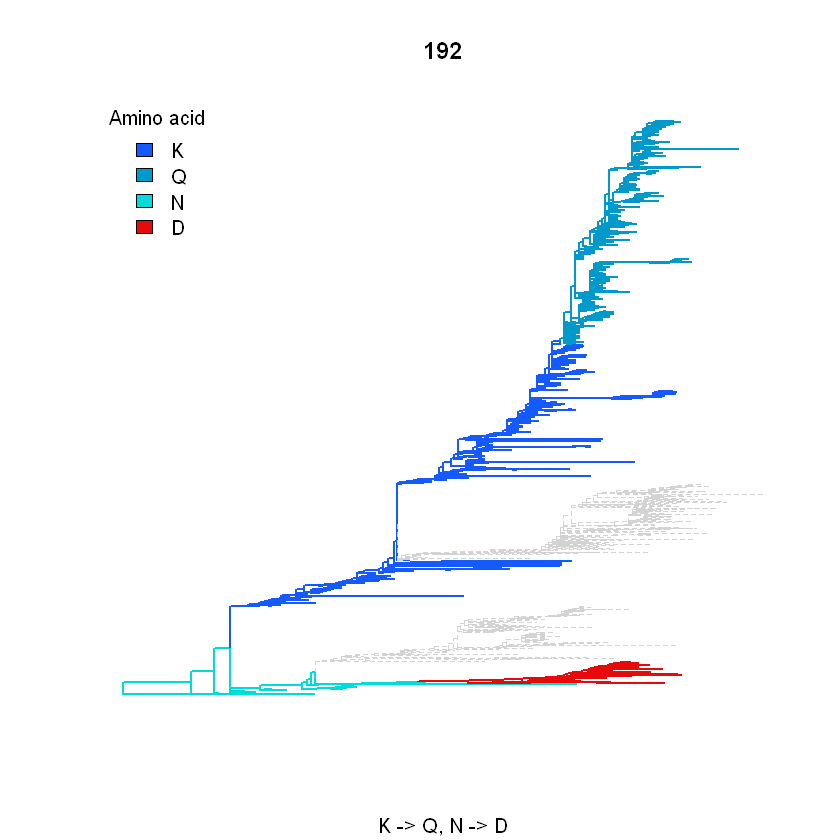

In [24]:
plotSingleSite(mutations, 192)

In [26]:
svg(filename = file.path(PLOTS_DIR, "multiFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 192)
invisible(dev.off())